In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Data.csv')
df['popular'].value_counts()


popular        123677
not-popular     41538
Name: popular, dtype: int64

In [16]:
df = pd.read_csv('Data.csv')
array = ['Rap', 'Pop','Country','Alternative','Indie','Jazz','Dance','Blues']
df = df.loc[df['genre'].isin(array)]
df = df.drop(['artist_name','track_name','track_id'],axis=1)
df = pd.get_dummies(df)
df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,...,time_signature_3/4,time_signature_4/4,time_signature_5/4,"bucket_(100000.0, 300000.0]","bucket_(300000.0, 500000.0]","bucket_(500000.0, 700000.0]","bucket_(700000.0, 900000.0]","bucket_(900000.0, 1000000.0]",popular_not-popular,popular_popular
0,242,84,0.5440,0.515,209274,0.479,0.005980,0.1910,-7.458,0.0261,...,0,1,0,1,0,0,0,0,0,1
1,243,86,0.0116,0.464,239507,0.852,0.000000,0.1080,-3.804,0.0670,...,0,1,0,1,0,0,0,0,0,1
2,244,84,0.7950,0.473,209400,0.371,0.000000,0.1090,-10.219,0.0405,...,0,1,0,1,0,0,0,0,0,1
3,245,81,0.6190,0.672,174358,0.588,0.241000,0.0992,-9.573,0.1330,...,0,1,0,1,0,0,0,0,0,1
4,246,79,0.6400,0.545,248467,0.330,0.000007,0.2200,-11.719,0.1640,...,0,1,0,1,0,0,0,0,0,1


In [17]:
X = df.drop(['popularity','popular_not-popular',
       'popular_popular'],axis=1)
y = df['popularity']
X.columns

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'lognorm_duration', 'Count', 'genre_Alternative',
       'genre_Blues', 'genre_Country', 'genre_Dance', 'genre_Indie',
       'genre_Jazz', 'genre_Pop', 'genre_Rap', 'key_A', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'time_signature_0/4',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4', 'bucket_(100000.0, 300000.0]',
       'bucket_(300000.0, 500000.0]', 'bucket_(500000.0, 700000.0]',
       'bucket_(700000.0, 900000.0]', 'bucket_(900000.0, 1000000.0]'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [19]:
scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



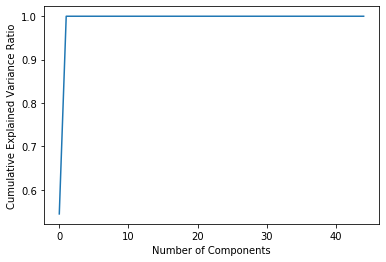

In [69]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
features = range(pca.n_components_)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.savefig('pca.png')

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [12]:
from sklearn import metrics

LR_Model = LinearRegression()
LR_Model.fit(X_train, y_train)
y_pred = LR_Model.predict(X_test)


LR_MAE = metrics.mean_absolute_error(y_test, y_pred)
LR_MSE = metrics.mean_squared_error(y_test, y_pred)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', LR_MAE)
print('Mean Squared Error:', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)

cv_scores_test= cross_val_score(LR_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(LR_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Mean Absolute Error: 0.29552891091996947
Mean Squared Error: 0.20157141629805525
Root Mean Squared Error: 0.44896705480252697
Mean cross validation test score: 0.3112012586274761
Mean cross validation train score: 0.30401476209528167


In [9]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.fit(X_test,y_test)
y_pred = RFC_Model.predict(X_test)
RFC_Accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",RFC_Accuracy)
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))

RFC_MAE = metrics.mean_absolute_error(y_test, y_pred)
RFC_MSE = metrics.mean_squared_error(y_test, y_pred)
RFC_RMSE  = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',RFC_MAE )
print('Mean Squared Error:', RFC_MSE)
print('Root Mean Squared Error:', RFC_RMSE)

cv_scores_test= cross_val_score(RFC_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(RFC_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 1.0
Precision: 1.0
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.14489311163895485
Mean cross validation train score: 0.260613125656572


In [11]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(KNN_Accuracy))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))
KNN_MAE = metrics.mean_absolute_error(y_test, y_pred)
KNN_MSE = metrics.mean_squared_error(y_test, y_pred)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', KNN_MAE)
print('Mean Squared Error:', KNN_MSE)
print('Root Mean Squared Error:', KNN_RMSE)

cv_scores_test= cross_val_score(KNN_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(KNN_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.00027146250424160164
Precision: 0.00027146250424160164
Mean Absolute Error: 36.67302341364099
Mean Squared Error: 1462.2901255514082
Root Mean Squared Error: 38.23990226911424


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.04275534441805226
Mean cross validation train score: 0.08262917636365819


In [12]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
y_pred = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(DT_Accuracy))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))

DT_MAE = metrics.mean_absolute_error(y_test, y_pred)
DT_MSE = metrics.mean_squared_error(y_test, y_pred)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', DT_MAE )
print('Mean Squared Error:', DT_MSE)
print('Root Mean Squared Error:', DT_RMSE)

cv_scores_test= cross_val_score(DT_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(DT_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.0164913471326773
Precision: 0.0164913471326773
Mean Absolute Error: 16.87818120122158
Mean Squared Error: 409.67329487614523
Root Mean Squared Error: 20.240387715558843


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.11523583305055989
Mean cross validation train score: 0.1812586168890983


In [14]:
AB_Model = AdaBoostClassifier()
AB_Model.fit(X_train, y_train)
y_pred = AB_Model.predict(X_test)
AB_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(AB_Accuracy))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label='positive',
                                           average='micro'))
AB_MAE = metrics.mean_absolute_error(y_test, y_pred)
AB_MSE = metrics.mean_squared_error(y_test, y_pred)
AB_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', AB_MAE)
print('Mean Squared Error:', AB_MSE)
print('Root Mean Squared Error:', AB_RMSE)

cv_scores_test= cross_val_score(AB_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(AB_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 6.786562606040041e-05
Precision: 6.786562606040041e-05
Mean Absolute Error: 44.764981336952836
Mean Squared Error: 2149.4323719036306
Root Mean Squared Error: 46.361971182248396


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.05239226331862912
Mean cross validation train score: 0.049102453057089664


In [15]:
model_performance = pd.DataFrame({'Model': ['LinearRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier','AdaBoostClassifier'
                                                      ],
                                            'Accuracy': [np.nan,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,AB_Accuracy
                                                         ],
                                            'MAE': [LR_MAE,
                                                         RFC_MAE,
                                                         KNN_MAE,
                                                         DT_MAE,AB_MAE
                                                         ],
                                            'MSE': [LR_MSE,
                                                         RFC_MSE,
                                                         KNN_MSE,
                                                         DT_MSE,AB_MSE
                                                         ],
                                            'RMSE': [LR_RMSE,
                                                         RFC_RMSE,
                                                         KNN_RMSE,
                                                         DT_RMSE,AB_RMSE
                                                         ]})



In [16]:
model_performance.sort_values(by = "Accuracy", ascending = True)

,Model,Accuracy,MAE,MSE,RMSE
4,AdaBoostClassifier,0.000068,44.764981,2149.432372,46.361971
2,KNeighborsClassifier,0.000271,36.673023,1462.290126,38.239902
3,DecisionTreeClassifier,0.016491,16.878181,409.673295,20.240388
1,RandomForestClassifier,1.000000,0.000000,0.000000,0.000000
0,LinearRegression,NaN,16.245047,423.599554,20.581534


In [25]:
from sklearn.model_selection import KFold
ada=AdaBoostClassifier()
crossvalidation=KFold(n_splits=3,shuffle=True,random_state=1)
search_grid={'n_estimators':[500,800],'learning_rate':[.7,0.01]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)

search.fit(X,y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.7, 0.01],
                         'n_estimators': [500, 800]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [26]:
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 800}

In [127]:
ada_Model=AdaBoostClassifier(learning_rate= .001, n_estimators= 800)
ada_Model.fit(X_train, y_train)
y_pred = ada_Model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

cv_scores_test= cross_val_score(ada_Model,X_test,y_test,cv=5)
cv_scores_train= cross_val_score(ada_Model,X_train,y_train,cv=5)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

Mean Absolute Error: 7.457482185273159
Mean Squared Error: 107.9223617237869
Root Mean Squared Error: 10.388568800551253
Accuracy: 0.052731591448931116


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Mean cross validation test score: 0.05503902273498473
Mean cross validation train score: 0.05308968525682176
Standard deviation cross validation scores: 0.0030531990170891065


In [20]:
LR_Model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1,normalize=False)
LR_Model.fit(X_train, y_train)
y_pred = LR_Model.predict(X_test)


LR_MAE = metrics.mean_absolute_error(y_test, y_pred)
LR_MSE = metrics.mean_squared_error(y_test, y_pred)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', LR_MAE)
print('Mean Squared Error:', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)

cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Mean Absolute Error: 32.65353682668893
Mean Squared Error: 1279.4488412494802
Root Mean Squared Error: 35.76938413293525
Mean cross validation test score: 0.9594329283562244
Mean cross validation train score: 0.9650506959614382


In [21]:
features = X
importances = list(LR_Model.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

plt.savefig('features.png')
plt.figure(figsize=(20,10))

index = [0,1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for RFC model',fontsize=15)

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

In [39]:
df = pd.read_csv('Data.csv')
array = ['Rap', 'Pop','Country','Alternative','Indie','Jazz','Dance','Blues']
df = df.loc[df['genre'].isin(array)]
df = df.drop(['popularity','artist_name','track_name','track_id'],axis=1)
df = pd.get_dummies(df)
df.head()

X = df.drop(['popular_not-popular','popular_popular'],axis=1)
y = df['popular_popular']
print(X.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'lognorm_duration', 'Count', 'genre_Alternative',
       'genre_Blues', 'genre_Country', 'genre_Dance', 'genre_Indie',
       'genre_Jazz', 'genre_Pop', 'genre_Rap', 'key_A', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'mode_Major', 'mode_Minor', 'time_signature_0/4',
       'time_signature_1/4', 'time_signature_3/4', 'time_signature_4/4',
       'time_signature_5/4', 'bucket_(100000.0, 300000.0]',
       'bucket_(300000.0, 500000.0]', 'bucket_(500000.0, 700000.0]',
       'bucket_(700000.0, 900000.0]', 'bucket_(900000.0, 1000000.0]'],
      dtype='object')


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative Explained Variance')

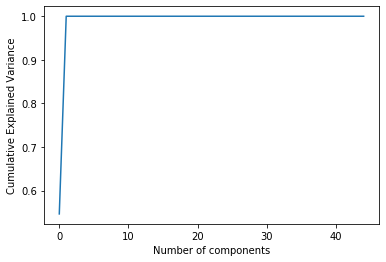

In [157]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
features = range(pca.n_components_)

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')

In [61]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_pred = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_pred)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_pred) 
print("AUC: " + str(RFC_AUC))

RFC_MAE = metrics.mean_absolute_error(y_test, RFC_pred)
RFC_MSE = metrics.mean_squared_error(y_test, RFC_pred)
RFC_RMSE = np.sqrt(metrics.mean_squared_error(y_test, RFC_pred))
print('Mean Absolute Error:', RFC_MAE)
print('Mean Squared Error:', RFC_MSE)
print('Root Mean Squared Error:', RFC_RMSE)

cv_scores_test= cross_val_score(RFC_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(RFC_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.8896504920257889
AUC: 0.5770007900653684
Mean Absolute Error: 8.677570410587037
Mean Squared Error: 0.11034950797421106
Root Mean Squared Error: 0.3321889642571093
Mean cross validation test score: 0.9611086577231169
Mean cross validation train score: 0.9735181077903752


In [58]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_pred = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_pred)
print("Accuracy: " + str(LR_Accuracy))

LR_Model.score(X_test, y_test)

LR_AUC = roc_auc_score(y_test, LR_pred) 
print("AUC: " + str(LR_AUC))

LR_MAE = metrics.mean_absolute_error(y_test, LR_pred)
LR_MSE = metrics.mean_squared_error(y_test, LR_pred)
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, LR_pred))
print('Mean Absolute Error:', LR_MAE)
print('Mean Squared Error:', LR_MSE)
print('Root Mean Squared Error:', LR_RMSE)
cv_scores_test= cross_val_score(LR_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(LR_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.5016627078384798
AUC: 0.5762786578598079
Mean Absolute Error: 119.09487614523243
Mean Squared Error: 0.4983372921615202
Root Mean Squared Error: 0.7059300901374868


/Users/nicholasseguljic/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Mean cross validation test score: 0.9185332361940514
Mean cross validation train score: 0.83841312874362


In [197]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
y_pred = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_test, y_pred) 
print("AUC: " + str(KNN_AUC))

KNN_MAE = metrics.mean_absolute_error(y_test, y_pred)
KNN_MSE = metrics.mean_squared_error(y_test, y_pred)
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',KNN_MAE)
print('Mean Squared Error:', KNN_MSE)
print('Root Mean Squared Error:', KNN_RMSE)



cv_scores_test= cross_val_score(KNN_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(KNN_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.09725144214455378
AUC: 0.5
Mean Absolute Error: 230.2008822531388
Mean Squared Error: 0.9027485578554462
Root Mean Squared Error: 0.9501308109178684
Mean cross validation test score: 0.8557527370633444
Mean cross validation train score: 0.9218453576872843


In [202]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
y_pred = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_test, y_pred) 
print("AUC: " + str(DT_AUC))

DT_MAE = metrics.mean_absolute_error(y_test, y_pred)
DT_MSE = metrics.mean_squared_error(y_test, y_pred)
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',DT_MAE)
print('Mean Squared Error:', DT_MSE)
print('Root Mean Squared Error:', DT_RMSE)

cv_scores_test= cross_val_score(DT_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(DT_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.09725144214455378
AUC: 0.5
Mean Absolute Error: 230.2008822531388
Mean Squared Error: 0.9027485578554462
Root Mean Squared Error: 0.9501308109178684
Mean cross validation test score: 0.8090407160303741
Mean cross validation train score: 0.8266760002540998


In [57]:
AB_Model = AdaBoostClassifier()
AB_Model.fit(X_train, y_train)
AB_pred = AB_Model.predict(X_test)
AB_Accuracy = accuracy_score(y_test, AB_pred)
print("Accuracy: " + str(AB_Accuracy))

AB_AUC = roc_auc_score(y_test, AB_pred) 
print("AUC: " + str(AB_AUC))

AB_MAE = metrics.mean_absolute_error(y_test, AB_pred)
AB_MSE = metrics.mean_squared_error(y_test, AB_pred)
AB_RMSE = np.sqrt(metrics.mean_squared_error(y_test, AB_pred))
print('Mean Absolute Error:',AB_MAE)
print('Mean Squared Error:', AB_MSE)
print('Root Mean Squared Error:', AB_RMSE)


cv_scores_test= cross_val_score(AB_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(AB_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()

print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))

Accuracy: 0.09474041398031897
AUC: 0.5
Mean Absolute Error: 230.84119443501865
Mean Squared Error: 0.905259586019681
Root Mean Squared Error: 0.9514513051226957
Mean cross validation test score: 0.9523362117277052
Mean cross validation train score: 0.9583769794429997


In [200]:
model_performance = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier','AdaBoostClassifier'
                                                      ],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,AB_Accuracy
                                                         ],
                                            'MAE': [LR_MAE,
                                                         RFC_MAE,
                                                         KNN_MAE,
                                                         DT_MAE,AB_MAE
                                                         ],
                                            'MSE': [LR_MSE,
                                                         RFC_MSE,
                                                         KNN_MSE,
                                                         DT_MSE,AB_MSE
                                                         ],
                                            'RMSE': [LR_RMSE,
                                                         RFC_RMSE,
                                                         KNN_RMSE,
                                                         DT_RMSE,AB_RMSE
                                                         ]})


In [201]:
model_performance.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy,MAE,MSE,RMSE
1,RandomForestClassifier,0.899355,1.635222,0.101052,0.317887
0,LogisticRegression,0.489243,123.985612,0.510757,0.714672
4,AdaBoostClassifier,0.247302,0.097251,0.097251,0.311852
2,KNeighborsClassifier,0.097251,230.200882,0.902749,0.950131
3,DecisionTreeClassifier,0.097251,230.200882,0.902749,0.950131


In [65]:
from sklearn.metrics import auc, precision_recall_curve

precisionAB, recallAB, thresholdsAB = precision_recall_curve(y_test, AB_pred)
pr_aucAB = auc(recallAB, precisionAB)

precisionlr, recalllr, thresholdslr \
            = precision_recall_curve(y_test,
                                     LR_pred)
pr_auclr = auc(recalllr, precisionlr)

precisionrfc, recallrfc, thresholdrfc = precision_recall_curve(y_test,
                                                             RFC_pred)
pr_aucrfc = auc(recallrfc, precisionrfc)


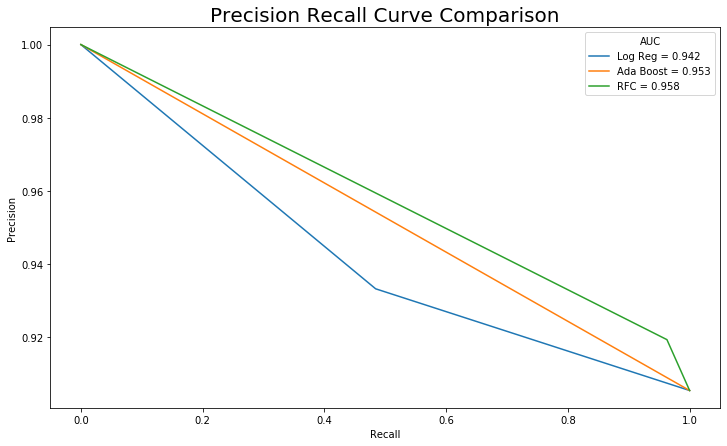

In [68]:
_ = plt.figure(figsize=(12,7))
_ = plt.title('Precision Recall Curve Comparison', size=20)
_ = plt.plot(recalllr, precisionlr, label = 'Log Reg = %0.3f' % pr_auclr)
_ = plt.plot(recallAB, precisionAB, label = 'Ada Boost = %0.3f' % pr_aucAB)
_ = plt.plot(recallrfc, precisionrfc, label = 'RFC = %0.3f' % pr_aucrfc)

_ = plt.ylabel('Precision')
_ = plt.xlabel('Recall')
_ = plt.legend(title='AUC')
plt.savefig('recall.png')
_ = plt.show()

In [32]:
param_grid = {'bootstrap': [True],
 'max_depth': [10, 40],
 'max_features': [2, 3],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [600, 1000]}
rf = RandomForestClassifier()
rf_cv= GridSearchCV(rf,param_grid,cv=5)
rf_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [33]:
rf_cv.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 1000}

In [13]:
RFC_Model = RandomForestClassifier(bootstrap= True,
 max_depth= 40,
 max_features= 2,
 min_samples_leaf= 4,
 min_samples_split= 5,
 n_estimators=1000)


RFC_Model.fit(X_train, y_train)
y_pred = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, y_pred) 
print("AUC: " + str(RFC_AUC))

cv_scores_test= cross_val_score(RFC_Model,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(RFC_Model,X_train,y_train,cv=5,scoring='roc_auc')
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation cross validation scores: ' +str(cv_scores_std_rf))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9045130641330166
AUC: 0.5
Mean cross validation test score: 0.9594329283562244
Mean cross validation train score: 0.9650506959614382
Standard deviation cross validation scores: 0.006503921978220515
Mean Absolute Error: 0.09548693586698337
Mean Squared Error: 0.09548693586698337
Root Mean Squared Error: 0.30900960481348044


In [48]:
df = pd.read_csv('Data.csv')
df = df.drop(['popularity','artist_name','track_name','track_id'],axis=1)
df = df[df['genre']=='Rap']
df = pd.get_dummies(df)
df.head()

X = df.drop(['popular_not-popular','popular_popular'],axis=1)
y = df['popular_popular']
print(X.columns)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler() 
X_trained = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_test, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'lognorm_duration', 'Count', 'genre_Rap', 'key_A', 'key_A#',
       'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F',
       'key_F#', 'key_G', 'key_G#', 'mode_Major', 'mode_Minor',
       'time_signature_0/4', 'time_signature_1/4', 'time_signature_3/4',
       'time_signature_4/4', 'time_signature_5/4',
       'bucket_(100000.0, 300000.0]', 'bucket_(300000.0, 500000.0]',
       'bucket_(500000.0, 700000.0]', 'bucket_(700000.0, 900000.0]'],
      dtype='object')
Accuracy: 0.9978343259339469
AUC: 0.5


                        Features  Importance scores
0                     Unnamed: 0           0.000000
1                   acousticness           0.000006
2                   danceability           0.000205
3                    duration_ms           0.000311
4                         energy           0.000468
5               instrumentalness           0.000754
6                       liveness           0.001079
7                       loudness           0.001158
8                    speechiness           0.001266
9                          tempo           0.001348
10                       valence           0.001359
11              lognorm_duration           0.001375
12                         Count           0.001498
13             genre_Alternative           0.001507
14                   genre_Blues           0.001616
15                 genre_Country           0.001622
16                   genre_Dance           0.001629
17                   genre_Indie           0.001756
18          

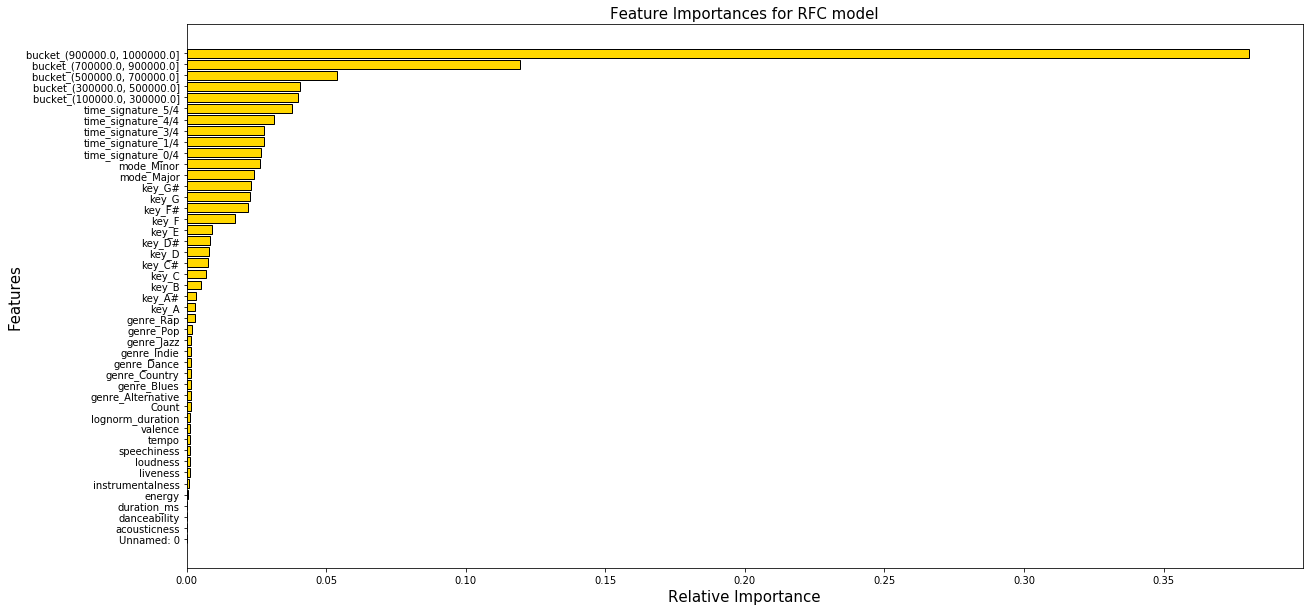

In [33]:
features = X
importances = list(RFC_Model.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)


plt.show()
plt.figure(figsize=(20,10))

index = [0,1,
2,
3,
4,
5,
6,
7,
8,
9,
10,
11,
12,
13,
14,
15,
16,
17,
18,
19,
20,
21,
22,
23,
24,
25,
26,
27,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for RFC model',fontsize=15)
plt.savefig('features.png')